In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
from scipy.stats import pearsonr

Desc
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876
Kurtosis: 6.536282


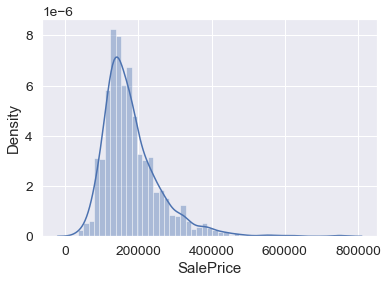

In [88]:
#df_train['SalePrice'].describe()
#IRIS.loc[:,["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].corr()
#data_desc = df_train.loc[:,["SalePrice","Utilities"]]
#print(data_desc)

# verificacion para ver tipo de dato e informacion contenida.
# lectura de data

df_train = pd.read_csv("train.csv")
print("Desc\n",df_train['SalePrice'].describe())
sns.distplot(df_train['SalePrice']);
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

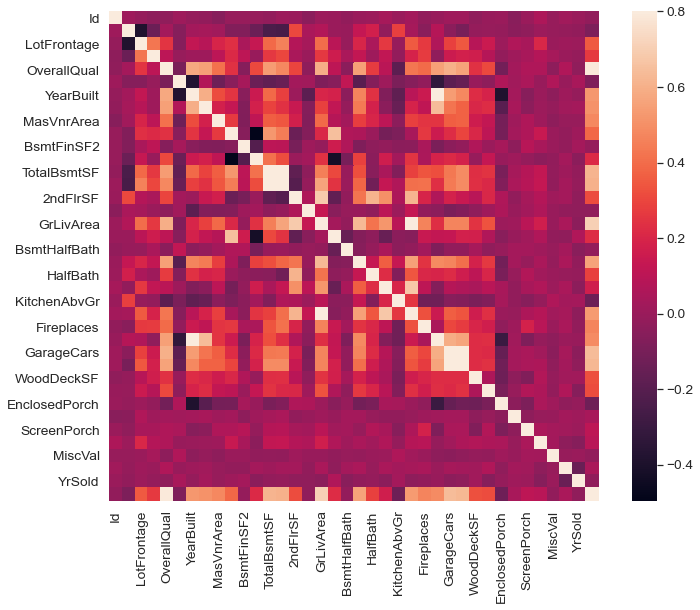

In [87]:
# matriz de correlacion

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [89]:
corr, _ = pearsonr(df_train["SalePrice"], df_train["GarageCars"])
print('GarageCars correlation: %.3f' % corr)

corr, _ = pearsonr(df_train["SalePrice"], df_train["OverallQual"])
print('OverallQual correlation: %.3f' % corr)

GarageCars correlation: 0.640
OverallQual correlation: 0.791


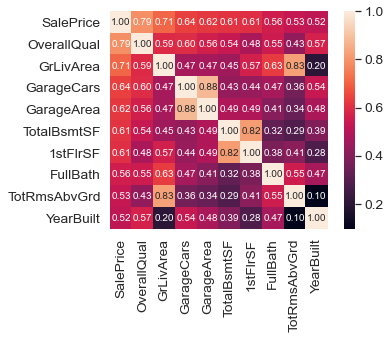

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


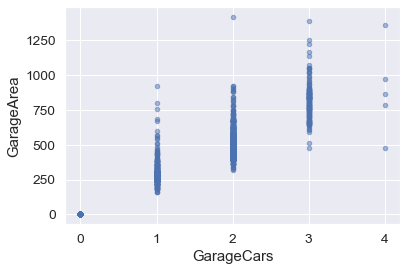

In [90]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# en la matriz se puede observa correlacion en variables basicas que afectan el precio del inmueble, a simple vista se observa,
# el area habitable por encima del nivel del suelo, tamaño del garaje, y año decontruccion; las variables GarageArea y GarageCars
# esta muy correlacionadas, por ende se puede hacer el analisis con una de ellas en este caso GarageCars, ya que es una medida
# mas exacta de uso efectivo.

var = 'GarageCars'
data = pd.concat([df_train['GarageArea'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='GarageArea', alpha = 0.5);


In [80]:
data_desc = df_train.loc[:,["SalePrice","OverallQual","GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF","TotRmsAbvGrd", "YearBuilt"]]
data_desc.describe()
#print(data_desc)

,SalePrice,OverallQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1.767123,472.980137,1057.429452,1162.626712,6.517808,1971.267808
std,79442.502883,1.382997,0.747315,213.804841,438.705324,386.587738,1.625393,30.202904
min,34900.000000,1.000000,0.000000,0.000000,0.000000,334.000000,2.000000,1872.000000
25%,129975.000000,5.000000,1.000000,334.500000,795.750000,882.000000,5.000000,1954.000000
50%,163000.000000,6.000000,2.000000,480.000000,991.500000,1087.000000,6.000000,1973.000000
75%,214000.000000,7.000000,2.000000,576.000000,1298.250000,1391.250000,7.000000,2000.000000
max,755000.000000,10.000000,4.000000,1418.000000,6110.000000,4692.000000,14.000000,2010.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


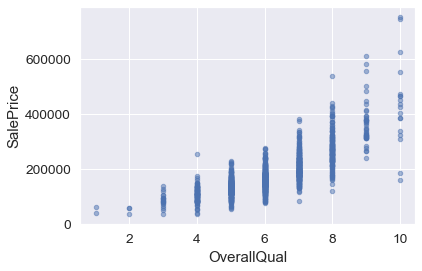

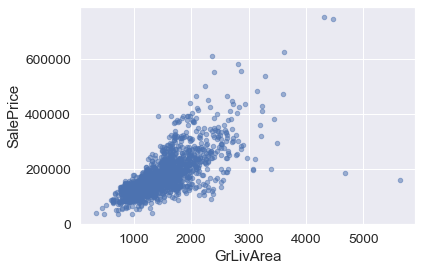

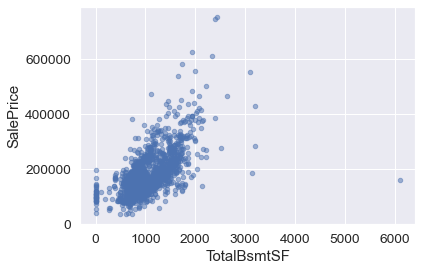

In [81]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

var1 = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y='SalePrice', alpha = 0.5);

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


PoolArea correlation: 0.092


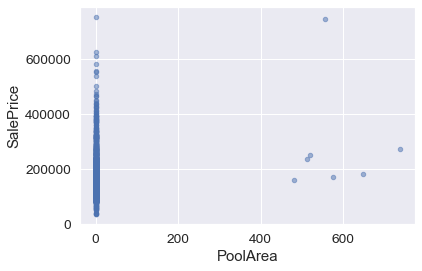

In [82]:
var = 'PoolArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha = 0.5);

corr, _ = pearsonr(df_train["SalePrice"], df_train["PoolArea"])
print('PoolArea correlation: %.3f' % corr)

#correlacion casi nula

In [83]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [84]:
# se eliminan los no numericos e informacion no relevante para elanalisis, ademas de que hay campos que guardan relacion
# como el area del garaje y el numero de autos que pueden guardar dentro del garaje